In [2]:
pkg load statistics;

N = 10000;  % Número de realizações

X = zeros(1, N);
Y = zeros(1, N);

for i = 1 : N
  urna = ['R' 'R' 'G' 'B'];
  idx1 = randi([1 4]);
  B1 = urna(idx1);
  urna(idx1) = [];
  idx2 = randi([1 3]);
  B2 = urna(idx2);
  urna(idx2) = [];
  X(i) = sum([B1 B2] == 'R');
  Y(i) = sum([B1 B2] == 'G');
end

x = [0 1 2];
y = [0 1];

% Conjunta

pmfXY_sim = hist3([X' Y'], {x, y}) / N
pmfXY_teo = [0 1/6; 1/3 1/3; 1/6 0]

% Marginais

pmfX_sim = hist(X, x) / N;
pmfX_teo = [1/6 2/3 1/6];

pmfY_sim = hist(Y, y) / N;
pmfY_teo = [1/2 1/2];

% Condicionais

pmfX_condY_sim = zeros(2, 3);
for i = 1:length(y)
  XcondY = X(Y == y(i));
  pmfX_condY_sim(i, :) = hist(XcondY, x) / sum(Y == y(i));
end
pmfX_condY_teo = [0 2/3 1/3; 1/3 2/3 0];

pmfY_condX_sim = zeros(3, 2);
for i = 1:length(x)
  YcondX = Y(X == x(i));
  pmfY_condX_sim(i, :) = hist(YcondX, y) / sum(X == x(i));
end
pmfY_condX_teo = [0 1; 1/2 1/2; 1 0];


pmfXY_sim =

        0   0.1691
   0.3304   0.3354
   0.1651        0

pmfXY_teo =

        0   0.1667
   0.3333   0.3333
   0.1667        0



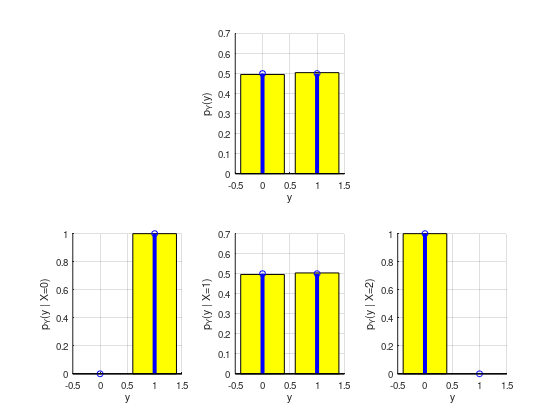

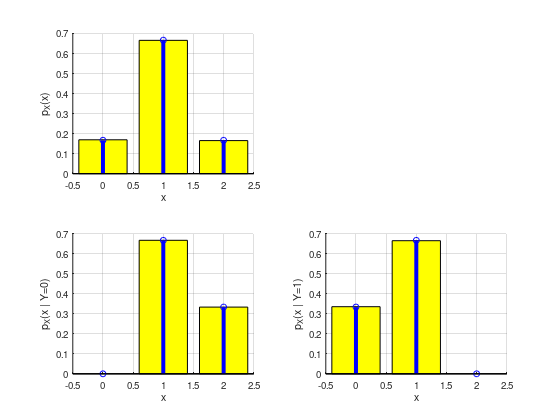

In [3]:
% Plots

figure;
subplot(2, 2, 1); hold on; grid on;
bar(x, pmfX_sim, 'y');
stem(x, pmfX_teo, 'b', 'LineWidth', 4);
xlabel('x'); ylabel('p_X(x)');
for i = 1 : length(y)
  subplot(2, 2, i + 2); hold on; grid on;
  bar(x, pmfX_condY_sim(i, :), 'y');
  stem(x, pmfX_condY_teo(i, :), 'b', 'LineWidth', 4);
  xlabel('x'); ylabel(sprintf('p_X(x | Y=%d)', y(i)));
end

figure;
subplot(2, 3, 2); hold on; grid on;
bar(y, pmfY_sim, 'y');
stem(y, pmfY_teo, 'b', 'LineWidth', 4);
xlabel('y'); ylabel('p_Y(y)');
for i = 1 : length(x)
  subplot(2, 3, i + 3); hold on; grid on;
  bar(y, pmfY_condX_sim(i, :), 'y');
  stem(y, pmfY_condX_teo(i, :), 'b', 'LineWidth', 4);
  xlabel('y'); ylabel(sprintf('p_Y(y | X=%d)', x(i)));
end